In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6

In [6]:
df = pd.read_csv('../../data/all-stocks-2006-01-01-to-2018-01-01.csv', parse_dates=['Date'])

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [20]:
df.Date.min(), df.Date.max()

(Timestamp('2006-01-03 00:00:00'), Timestamp('2017-12-29 00:00:00'))

In [8]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [9]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [11]:
year_end_dates = sample_dates[sample_dates.is_year_end]

In [12]:
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [13]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head(5)

In [14]:
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [16]:
ws = worst_stocks['Name'].values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [17]:
tdf = df.copy()
tdf.set_index('Date', inplace=True)

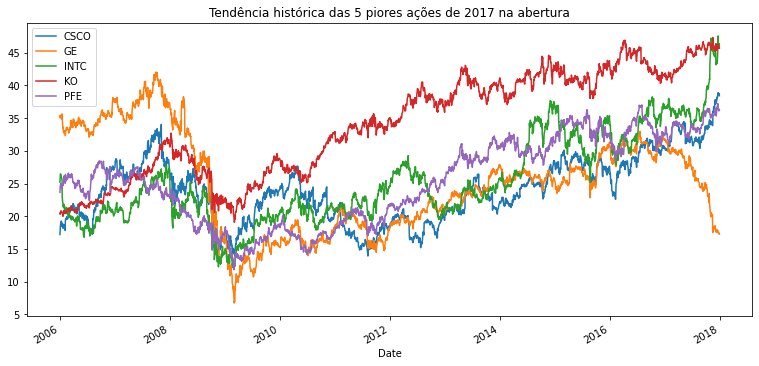

In [19]:
tdf[tdf['Name'].isin(ws)].groupby('Name').Open.plot(title='Tendência histórica das 5 piores ações de 2017 na abertura',
                                                    legend=True);

In [22]:
best_stocks = df[df.Date == df.Date.max()].sort_values('Open', ascending=False).head(5)
best_stocks

,Date,Open,High,Low,Close,Volume,Name
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL
12078,2017-12-29,296.94,297.30,294.83,294.91,1824591,BA
36237,2017-12-29,255.87,256.65,252.91,254.76,2519253,GS
3019,2017-12-29,236.48,237.31,235.37,235.37,1343878,MMM


In [23]:
bs = best_stocks['Name'].values
bs

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

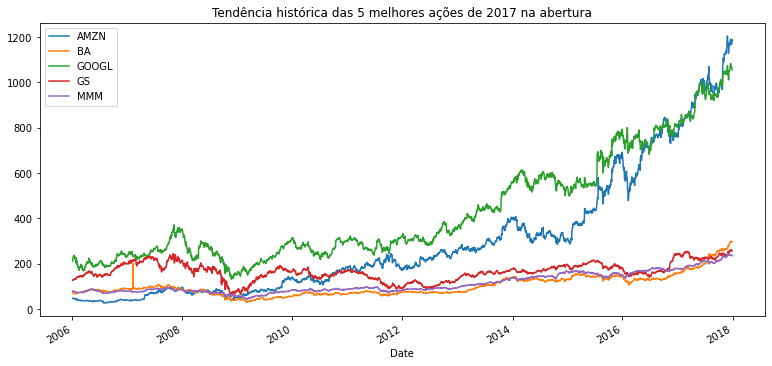

In [24]:
tdf[tdf['Name'].isin(bs)].groupby('Name').Open.plot(title='Tendência histórica das 5 melhores ações de 2017 na abertura',
                                                    legend=True);